In [ ]:
# dg casting void - cast03

Next, change directory to wherever you created your folder. 

In [ ]:
import os

# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/home/studio-lab-user/ml635e/cast03'
WORKING_DIRECTORY = '/notebooks/ml635e/cast03'

os.chdir(WORKING_DIRECTORY)
!pwd

In [ ]:
# List the contents of your working directory
# It should contain at least three folders: images, train_labels, and val_labels
!ls -la

Now, let's install the Detecto package using pip. 

In [4]:
# Note: if it states you must restart the runtime in order to use a
# newly installed version of a package, you do NOT need to do this. 
!pip install detecto

Import everything we need in the following code block:

In [9]:
!apt-get install -y python3-opencv

E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 


In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

To check that everything's working, we can try reading in one of the images from our images folder. 

In [12]:
%%bash
find ./images -type f | tail -n1

./images/cast_def_0_466.jpeg


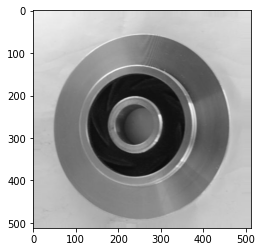

In [13]:
image = utils.read_image('./images/cast_ok_0_775.jpeg')
plt.imshow(image)
plt.show()

How cute! Now, we're ready to create our dataset and train our model. However, before doing so, it's a bit slow working with hundreds of individual XML label files, so we should convert them into a single CSV file to save time later down the line. 

In [14]:
# Do this twice: once for our trning labels and once for our validation labels
utils.xml_to_csv('train', 'train.csv')
utils.xml_to_csv('val', 'val.csv')

filename  width  height class  xmin  ymin  xmax  ymax  \
0   cast_def_0_1283.jpeg    512     512  Void   165   406   197   447   
1   cast_def_0_1115.jpeg    512     512  Void   155   134   171   154   
2     cast_def_0_42.jpeg    512     512  Void   270    97   297   121   
3   cast_def_0_1381.jpeg    512     512  Void   276   460   313   493   
4   cast_def_0_1616.jpeg    512     512  Void   222    80   244    97   
5   cast_def_0_1616.jpeg    512     512  Void   358   121   371   138   
6   cast_def_0_1547.jpeg    512     512  Void   158   110   185   130   
7   cast_def_0_1443.jpeg    512     512  Void   132   312   152   333   
8   cast_def_0_1443.jpeg    512     512  Void   235   408   244   414   
9   cast_def_0_1112.jpeg    512     512  Void   279   482   307   497   
10  cast_def_0_1015.jpeg    512     512  Void   202   387   224   402   
11  cast_def_0_1155.jpeg    512     512  Void    55   124    93   152   
12  cast_def_0_1137.jpeg    512     512  Void   185    88   197   100   
13  cast_def_0_1446.jpeg    512     512  Void   262   397   299   419   
14  cast_def_0_1658.jpeg    512     512  Void   337   411   380   444   
15  cast_def_0_1077.jpeg    512     512  Void   262   417   285   442   

    image_id  
0          0  
1          1  
2          2  
3          3  
4          4  
5          4  
6          5  
7          6  
8          6  
9          7  
10         8  
11         9  
12        10  
13        11  
14        12  
15        13

Below, we create our dataset, applying a couple of transforms beforehand. These are optional, but they can be useful for augmenting your dataset without gathering more data. 

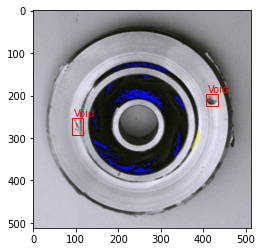

In [15]:
# Specify a list of transformations for our dataset to apply on our images
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('train.csv', 'images/')

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Finally, let's train our model! First, we create a DataLoader over our dataset to specify how we feed the images into our model. We also use our validation dataset to track the accuracy of the model throughout training. 

In [16]:
!date -d "-4 hours"

Thu Jun  9 21:46:49 UTC 2022


Thu Jun  9 21:47:00 UTC 2022


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|          | 0/10 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168290/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:03<00:00,  4.03it/s]


Loss: 0.2593714972691877
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:03<00:00,  3.90it/s]


Loss: 0.25070442631840706
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:03<00:00,  3.89it/s]


Loss: 0.2977409304252693
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:03<00:00,  3.77it/s]


Loss: 0.2966720201075077
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:03<00:00,  4.11it/s]


Loss: 0.2937450259923935
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:03<00:00,  4.11it/s]


Loss: 0.2909167323793684
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:03<00:00,  3.92it/s]


Loss: 0.29457988164254595
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:03<00:00,  4.10it/s]


Loss: 0.29077786739383427
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:03<00:00,  3.91it/s]


Loss: 0.29613293281623293
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


Begin iterating over validation dataset


100%|██████████| 14/14 [00:03<00:00,  4.11it/s]


Loss: 0.29473808673875673


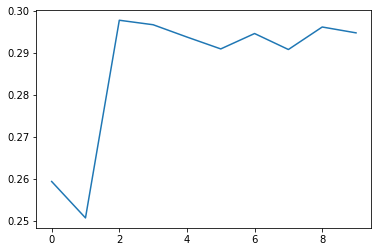

Thu Jun  9 21:49:16 UTC 2022


In [17]:
# Create our validation dataset
!date -d "-4 hours"
val_dataset = core.Dataset('val.csv', 'images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['Void'])

# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=10, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()
!date -d "-4 hours"


Let's see how well our model does on a couple images from our validation set:

tensor([[[0.3481, 0.3652, 0.3823,  ..., 0.2282, 0.2282, 0.2282],
         [0.3481, 0.3652, 0.3823,  ..., 0.2111, 0.1939, 0.1939],
         [0.3652, 0.3652, 0.3823,  ..., 0.1939, 0.1768, 0.1597],
         ...,
         [0.7419, 0.7077, 0.6906,  ..., 0.4679, 0.5022, 0.5536],
         [0.7762, 0.7248, 0.6906,  ..., 0.4851, 0.5193, 0.5707],
         [0.7933, 0.7419, 0.7077,  ..., 0.5364, 0.5878, 0.6563]],

        [[0.4853, 0.5028, 0.5203,  ..., 0.3627, 0.3627, 0.3627],
         [0.4853, 0.5028, 0.5203,  ..., 0.3452, 0.3277, 0.3277],
         [0.5028, 0.5028, 0.5203,  ..., 0.3277, 0.3102, 0.2927],
         ...,
         [0.8880, 0.8529, 0.8354,  ..., 0.6078, 0.6429, 0.6954],
         [0.9230, 0.8704, 0.8354,  ..., 0.6254, 0.6604, 0.7129],
         [0.9405, 0.8880, 0.8529,  ..., 0.6779, 0.7304, 0.8004]],

        [[0.7054, 0.7228, 0.7402,  ..., 0.5834, 0.5834, 0.5834],
         [0.7054, 0.7228, 0.7402,  ..., 0.5659, 0.5485, 0.5485],
         [0.7228, 0.7228, 0.7402,  ..., 0.5485, 0.5311, 0.

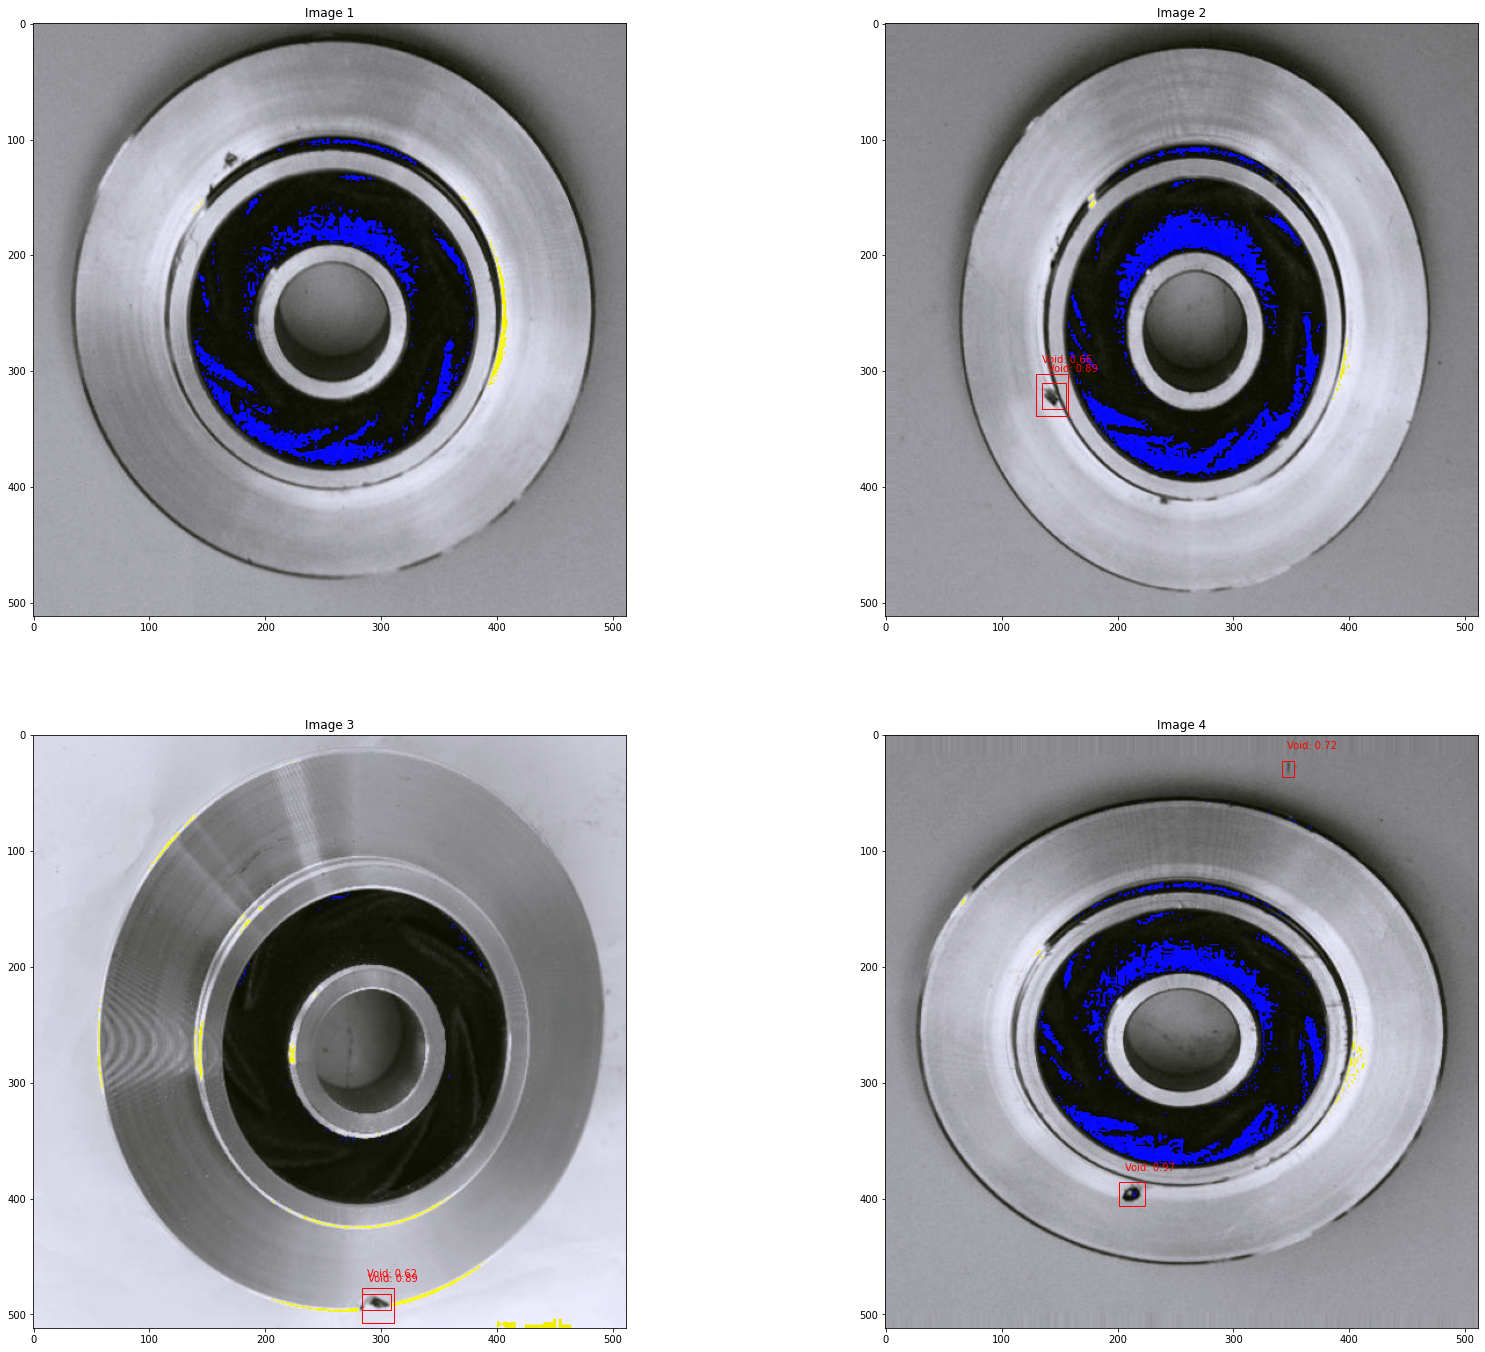

In [18]:
images = []
# Create a list of images  from val_dataset
for i in range(5, 9, 1):
    image, _ = val_dataset[i]
    images.append(image)
    print(image)

# Plot a 3x3 grid of the model's predictions on our 9 images
visualize.plot_prediction_grid(model, images, dim=(2, 2), figsize=(28, 24))

In [19]:
!find ./testfinal -type f | tail -n -3
!pwd

./testfinal/cast_def_0_9591.jpeg
./testfinal/cast_def_0_9687.jpeg
./testfinal/cast_ok_0_645.jpeg
/notebooks/ml635e/cast03


In [20]:
f1=os.listdir("./testfinal")
print(f1)
import pathlib
for filepath in pathlib.Path("testfinal/").glob('**/*'):
    print(filepath.absolute())

['cast_def_0_4526.jpeg', 'cast_def_0_9591.jpeg', 'cast_def_0_9687.jpeg', 'cast_ok_0_645.jpeg']
/notebooks/ml635e/cast03/testfinal/cast_def_0_4526.jpeg
/notebooks/ml635e/cast03/testfinal/cast_def_0_9591.jpeg
/notebooks/ml635e/cast03/testfinal/cast_def_0_9687.jpeg
/notebooks/ml635e/cast03/testfinal/cast_ok_0_645.jpeg


(['Void', 'Void', 'Void', 'Void', 'Void', 'Void', 'Void'], tensor([[201.1187,  96.4441, 222.9060, 115.6992],
        [287.2880,  37.6633, 312.9994,  50.5023],
        [196.7326,  89.8622, 225.2951, 125.1408],
        [282.8850,  33.7642, 308.6571,  53.2989],
        [291.6176,  37.7761, 308.3300,  47.1831],
        [283.9964,  27.5561, 311.8454,  63.5807],
        [287.7989,  40.6913, 308.6627,  55.6624]]), tensor([0.9646, 0.7618, 0.5644, 0.2888, 0.2613, 0.1036, 0.0755]))
[(['Void'], tensor([[201.1187,  96.4441, 222.9060, 115.6992]]), tensor([0.9646]))]


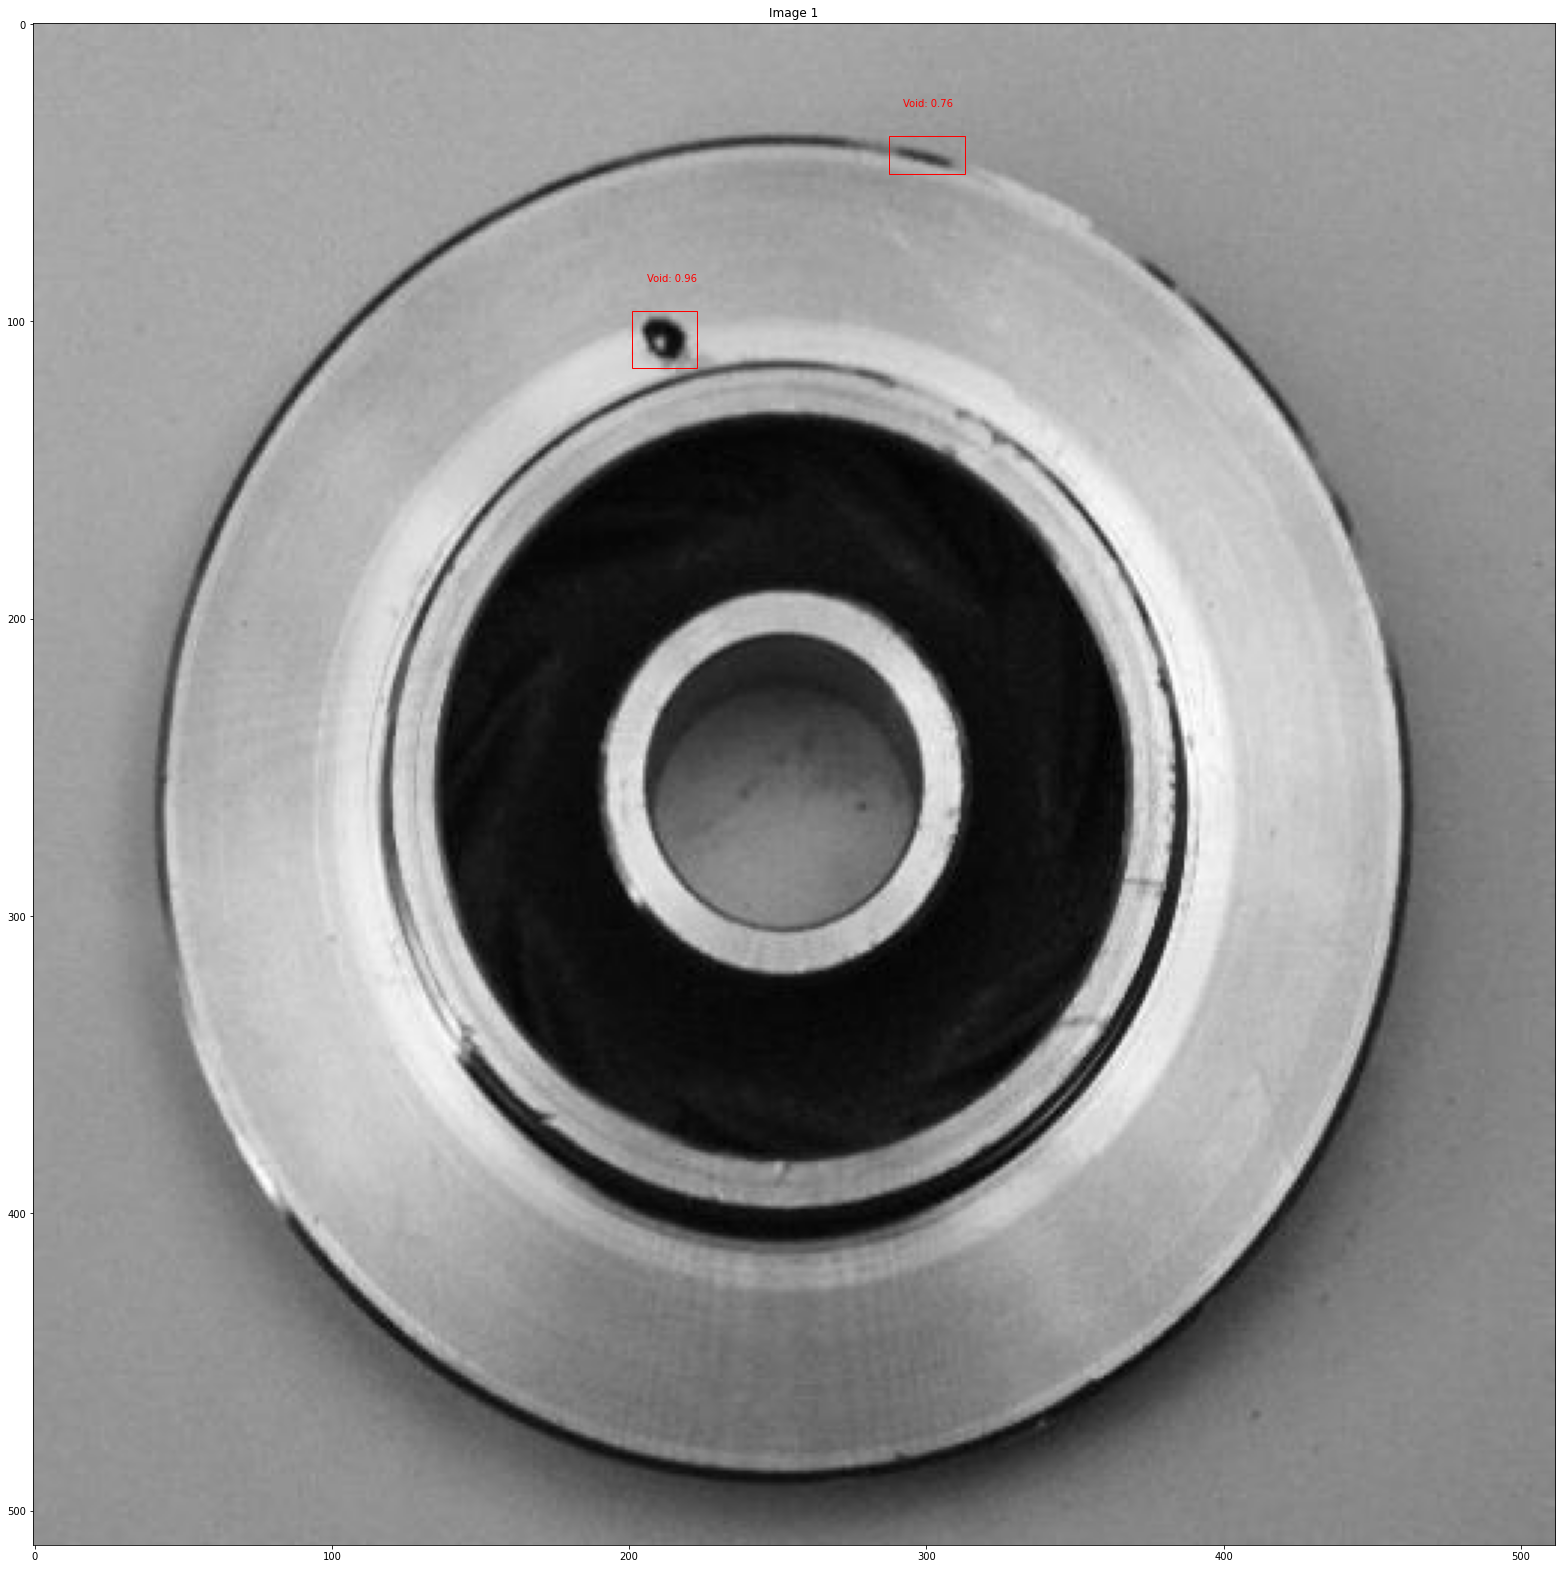

In [21]:
# one image prediction.

image = utils.read_image('./testfinal/cast_def_0_9591.jpeg')
predictions = model.predict(image)

images = []
# for i in range(4):
#     image, _ = val_dataset[i]
images.append(image)

top_predictions = model.predict_top(images)

print(predictions)
print(top_predictions)
visualize.plot_prediction_grid(model, images, dim=(1, 1), figsize=(28, 28))


In [22]:
# error -  IndexError: index 0 is out of bounds for axis 0 with size 0

!pwd
testfinal_data = core.Dataset( 'testfinal/')
print(val_dataset)
print(val_dataset[0])
print(testfinal_data)
print(testfinal_data[1])
images = []
for i in range(0,3,1):
    print(i)
    image, _ = testfinal_data[i]
    images.append(image)
top_predictions = model.predict_top(images)
# print(predictions)
print(top_predictions)    
visualize.plot_prediction_grid(model, images, dim=(4, 1), figsize=(128, 128))

/notebooks/ml635e/cast03
(tensor([[[0.6221, 0.6221, 0.6221,  ..., 0.4337, 0.4337, 0.4337],
         [0.6221, 0.6221, 0.6221,  ..., 0.4337, 0.4337, 0.4337],
         [0.6221, 0.6221, 0.6221,  ..., 0.4337, 0.4337, 0.4337],
         ...,
         [1.2043, 1.2043, 1.2043,  ..., 0.9646, 0.9646, 0.9646],
         [1.2043, 1.2043, 1.2043,  ..., 0.9646, 0.9646, 0.9646],
         [1.2043, 1.2043, 1.2043,  ..., 0.9646, 0.9646, 0.9646]],

        [[0.7654, 0.7654, 0.7654,  ..., 0.5728, 0.5728, 0.5728],
         [0.7654, 0.7654, 0.7654,  ..., 0.5728, 0.5728, 0.5728],
         [0.7654, 0.7654, 0.7654,  ..., 0.5728, 0.5728, 0.5728],
         ...,
         [1.3606, 1.3606, 1.3606,  ..., 1.1155, 1.1155, 1.1155],
         [1.3606, 1.3606, 1.3606,  ..., 1.1155, 1.1155, 1.1155],
         [1.3606, 1.3606, 1.3606,  ..., 1.1155, 1.1155, 1.1155]],

        [[0.9842, 0.9842, 0.9842,  ..., 0.7925, 0.7925, 0.7925],
         [0.9842, 0.9842, 0.9842,  ..., 0.7925, 0.7925, 0.7925],
         [0.9842, 0.9842, 0.9842

IndexError: single positional indexer is out-of-bounds

/notebooks/ml635e/cast03/testfinal/cast_def_0_4526.jpeg
/notebooks/ml635e/cast03/testfinal/cast_def_0_9591.jpeg
/notebooks/ml635e/cast03/testfinal/cast_def_0_9687.jpeg
/notebooks/ml635e/cast03/testfinal/cast_ok_0_645.jpeg


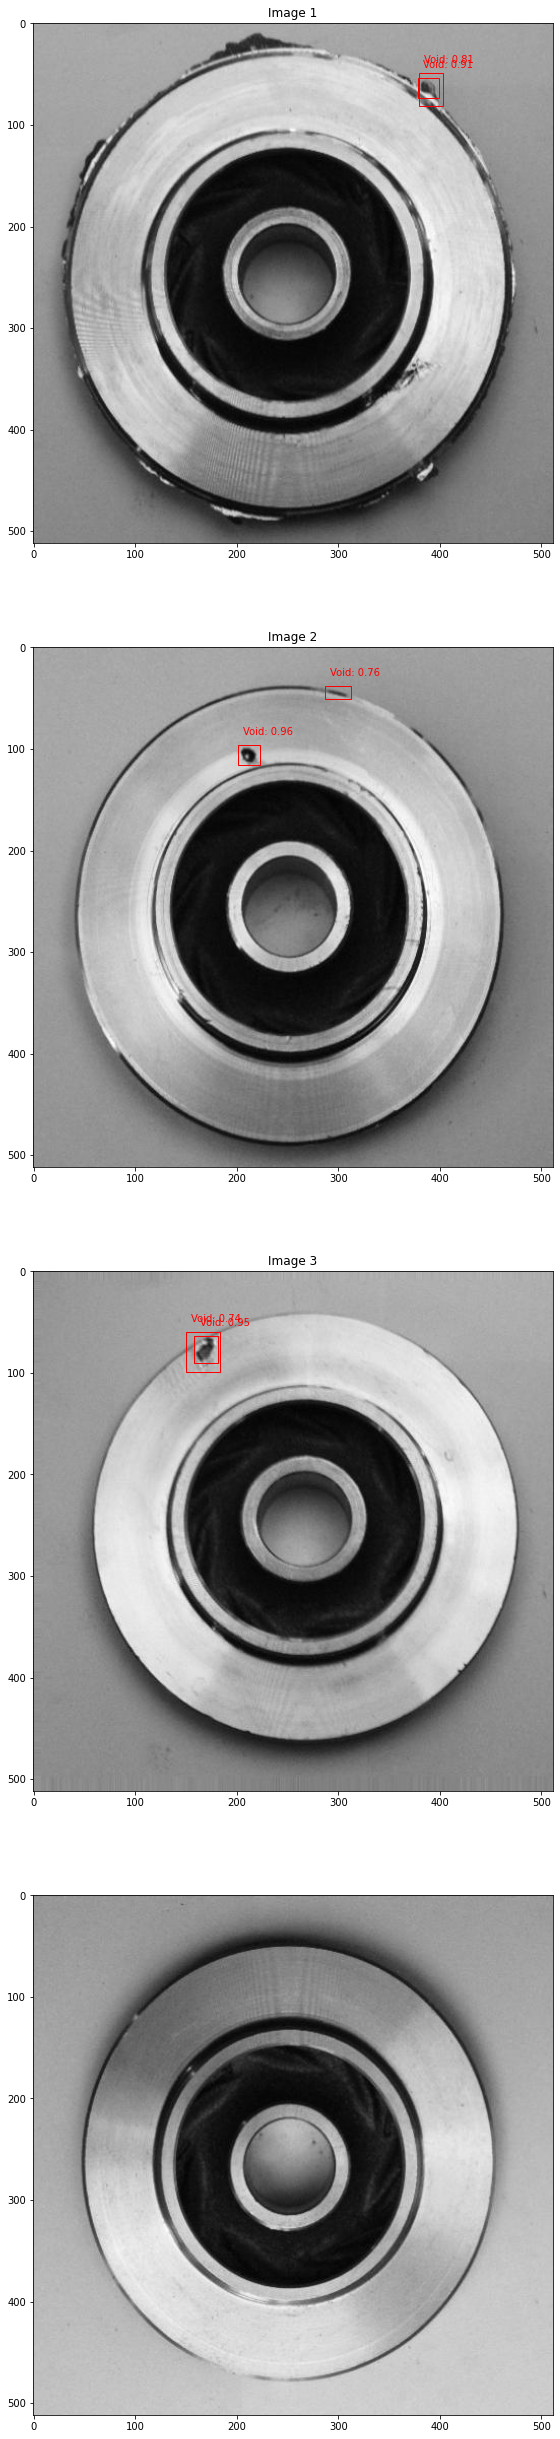

In [23]:
# 203 loop show predictions

images = []
import pathlib
for filepath in pathlib.Path("testfinal/").glob('**/*'):
    print(filepath.absolute())
    path01=str(filepath.absolute())
    image = utils.read_image(path01)
    images.append(image)

# top_predictions = model.predict_top(images)
# print(top_predictions)

visualize.plot_prediction_grid(model, images, dim=(4, 1), figsize=(44, 44))


In [24]:
import datetime
dtnow = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
fout = f"../../modelweights_cast03_{dtnow}.pth"
model.save(fout)
# model.save("modelweight.pth")
!pwd;ls

/notebooks/ml635e/cast03
excl  images  testfinal  train	train.csv  unused  val	val.csv


## Conclusion

Thanks for making it this far through the demo!

This is as far as the demo goes, but a great next step would be seeing how well the model works on a live video of Chihuahuas and Golden Retrievers in the same frame at the same time. To learn more about Detecto, be sure to check out the [Quickstart guide](https://detecto.readthedocs.io/en/latest/usage/quickstart.html), [Further Usage guide](https://detecto.readthedocs.io/en/latest/usage/further-usage.html), and [API docs](https://detecto.readthedocs.io/en/latest/api.html)!